In [2]:
import pandas as pd
df=pd.read_csv('../Datasets/economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
df.corr()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


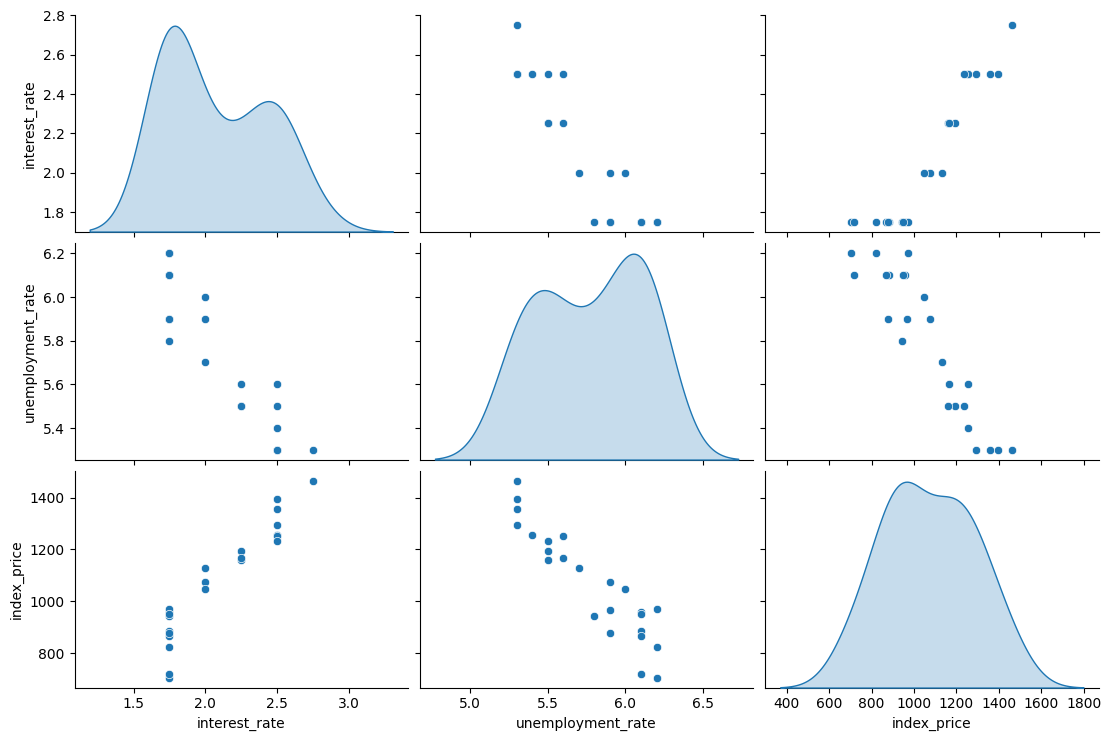

In [7]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde', markers='o', height=2.5, aspect=1.5)

In [6]:
df.drop(['Unnamed: 0','year','month'], axis=1, inplace=True)

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train

array([[ 1.01668045, -1.25970412],
       [ 0.27372166, -0.64600211],
       [-1.21219592,  1.19510391],
       [ 1.01668045, -1.25970412],
       [-1.21219592,  0.5814019 ],
       [ 1.01668045, -0.95285311],
       [-0.46923713, -0.03230011],
       [ 1.01668045, -0.33915111],
       [-0.46923713,  0.8882529 ],
       [ 0.27372166, -0.64600211],
       [ 1.75963925, -1.25970412],
       [ 1.01668045, -0.64600211],
       [ 1.01668045, -1.25970412],
       [-1.21219592,  1.50195491],
       [-1.21219592,  1.19510391],
       [-1.21219592,  1.19510391],
       [ 0.27372166, -0.33915111],
       [-0.46923713,  0.5814019 ],
       [-1.21219592,  1.50195491]])

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [13]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train,y_train,cv=3,scoring='neg_root_mean_squared_error')

In [16]:
import numpy as np

In [17]:
np.mean(scores)

np.float64(-99.60558522299992)

In [18]:
y_pred = model.predict(X_test)

In [19]:
residuals = y_test - y_pred

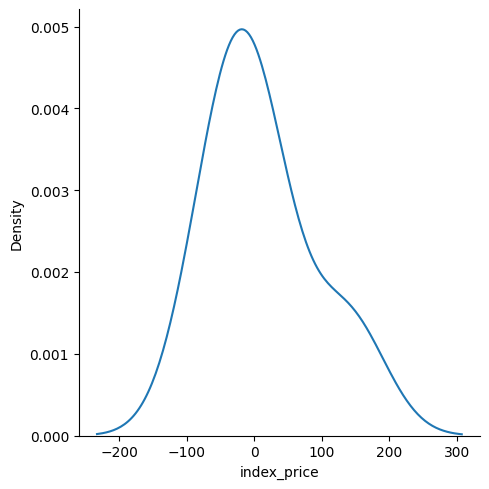

In [22]:
sns.displot(residuals,kind='kde')

In [25]:
model.coef_, model.intercept_

(array([  86.46713555, -116.92201457]), np.float64(1112.7368421052631))